## Agregación de datos por categoría

In [1]:
# Agregar datos es combinar con algun criterio el mas tipico es una varibale categorica para junatar todo la informacion de una misma categoria.
# Es comun utilizar variables categoricas y tomar una decision de donde pertenece cada elemento.

In [4]:
import numpy as np
import pandas as pd

In [5]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [6]:


n = 500 # tamaño del dataset

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))



In [7]:
gender_data[1:10]

['Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female']

In [8]:
income_data[1:10]

['Poor',
 'Rich',
 'Rich',
 'Poor',
 'Poor',
 'Rich',
 'Poor',
 'Middle Class',
 'Rich']

In [9]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n) # dist normal, media=160 y dispercion=30
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [10]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [11]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,196.452054,58.523757,21.737296,21302.769977
1,Female,Poor,188.257761,33.874115,27.256809,18565.118295
2,Male,Rich,155.926819,15.735645,28.017813,18768.398253
3,Female,Rich,126.607558,79.641549,54.710038,21179.913406
4,Female,Poor,186.006180,58.846956,32.470085,18087.860754


## Agrupación de datos

In [12]:
grouped_gender = data.groupby("Gender")

In [13]:
grouped_gender.groups

{'Female': Int64Index([  1,   3,   4,   5,   7,   9,  10,  11,  12,  13,
             ...
             482, 484, 485, 488, 489, 490, 494, 496, 497, 499],
            dtype='int64', length=261),
 'Male': Int64Index([  0,   2,   6,   8,  14,  15,  18,  20,  22,  23,
             ...
             477, 481, 483, 486, 487, 491, 492, 493, 495, 498],
            dtype='int64', length=239)}

In [14]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
1    Female            Poor  188.257761  33.874115  27.256809  18565.118295
3    Female            Rich  126.607558  79.641549  54.710038  21179.913406
4    Female            Poor  186.006180  58.846956  32.470085  18087.860754
5    Female            Poor  176.127121  38.525596  25.959692  21316.357914
7    Female            Poor  177.763142  88.547066  53.390767  21442.018489
..      ...             ...         ...        ...        ...           ...
490  Female            Poor  165.472259  43.733844  55.779280  18390.980090
494  Female            Poor  164.972618  60.311780  36.138455  19369.806609
496  Female    Middle Class  206.006248  92.545544  22.343879  20799.803026
497  Female            Rich  156.323279  59.228023   7.282517  20180.219816
499  Female            Poor  132.773105  54.387855  -7.882661  20604.985862

[261 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  

In [15]:
grouped_gender.get_group("Female") #para mostrar un grupo en espesifico

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Poor,188.257761,33.874115,27.256809,18565.118295
3,Female,Rich,126.607558,79.641549,54.710038,21179.913406
4,Female,Poor,186.006180,58.846956,32.470085,18087.860754
5,Female,Poor,176.127121,38.525596,25.959692,21316.357914
7,Female,Poor,177.763142,88.547066,53.390767,21442.018489
...,...,...,...,...,...,...
490,Female,Poor,165.472259,43.733844,55.779280,18390.980090
494,Female,Poor,164.972618,60.311780,36.138455,19369.806609
496,Female,Middle Class,206.006248,92.545544,22.343879,20799.803026
497,Female,Rich,156.323279,59.228023,7.282517,20180.219816


In [16]:
double_group = data.groupby(["Gender", "Economic Status"])

In [17]:
len(double_group)

6

In [18]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
12   Female    Middle Class  125.430432  47.002335  34.655052  18029.090721
27   Female    Middle Class  178.286822  92.032690  27.329780  18165.256154
50   Female    Middle Class  122.103794  35.988231  37.515558  20479.840170
54   Female    Middle Class  202.822678  38.629116   9.314484  19598.204111
55   Female    Middle Class  183.696376  27.381239  32.734226  20115.028124
..      ...             ...         ...        ...        ...           ...
480  Female    Middle Class  150.952793  27.488793  23.000151  20073.086665
482  Female    Middle Class  193.838673  42.650375  29.329539  18948.869847
485  Female    Middle Class  145.956050  42.239268  36.252857  20764.737568
488  Female    Middle Class  164.224282  65.542493  13.741721  19703.205861
496  Female    Middle Class  206.006248  92.545544  22.343879  20799.803026

[86 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados

In [19]:
# aGregar datos: aplicar una operacion aritmetica, implica aplicar una funcion a cada uno e los grupos y obtener un resultado

In [20]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     14002.717753  5339.651458  2634.972936  1.683997e+06
       Poor             14773.631796  5566.094174  2941.134919  1.758668e+06
       Rich             13850.331667  5394.899598  2504.934993  1.700730e+06
Male   Middle Class     12737.693158  5413.153726  2547.499494  1.615424e+06
       Poor             12765.152479  5171.133199  2552.647437  1.575032e+06
       Rich             12509.864484  4927.559132  2428.909885  1.526148e+06

In [21]:
double_group.mean() #promedio

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     162.822299  62.088970  30.639220  19581.359983
       Poor             165.995863  62.540384  33.046460  19760.317968
       Rich             161.050368  62.731391  29.127151  19775.933351
Male   Middle Class     155.337721  66.014070  31.067067  19700.288223
       Poor             159.564406  64.639165  31.908093  19687.896009
       Rich             162.465773  63.994274  31.544284  19820.098798

In [22]:
double_group.size()

Gender  Economic Status
Female  Middle Class       86
        Poor               89
        Rich               86
Male    Middle Class       82
        Poor               80
        Rich               77
dtype: int64

In [23]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      86.0  162.822299  28.122342   83.142791  145.830475   
       Poor              89.0  165.995863  27.841259   94.127446  144.544452   
       Rich              86.0  161.050368  29.223088   94.030744  138.556798   
Male   Middle Class      82.0  155.337721  30.675387   76.734069  132.431019   
       Poor              80.0  159.564406  36.254256   84.690046  135.592395   
       Rich              77.0  162.465773  29.632989  104.061802  139.951853   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     163.171409  181.106969  230.272958   86.0  62.088970   
       Poor             165.472259  187.228759  245.894476   89.0  62.540384   
       Rich             161.301644  181.611539  218.749397   86.0  62.731391   
Male   Middle Class     155.686455  176.670865  233.592927   82.0  66.014070   
       Poor             156.978406  179.694949  260.835937   80.0  64.639165   
       Rich             159.933597  185.578696  225.689326   77.0  63.994274   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  38.164716  54.633155   86.0  19581.359983   
       Poor             ...  40.464534  61.788963   89.0  19760.317968   
       Rich             ...  37.687864  54.710038   86.0  19775.933351   
Male   Middle Class     ...  37.602811  56.086724   82.0  19700.288223   
       Poor             ...  42.505597  55.482641   80.0  19687.896009   
       Rich             ...  40.489555  64.932330   77.0  19820.098798   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     1032.598568  18003.301750  18554.218501  19578.256910   
       Poor              924.459794  18039.612621  19048.510006  19861.585082   
       Rich              978.297539  18040.527483  18998.152507  19859.907476   
Male   Middle Class     1029.531293  18012.126153  18937.812703  19653.905930   
       Poor             1022.094811  18071.473605  18859.780238  19605.716077   
       Rich             1005.437121  18053.248146  18957.954551  19884.233311   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20444.393678  21372.327587  
       Poor             20468.227491  21475.870623  
       Rich             20601.165076  21454.274408  
Male   Middle Class     20574.062552  21498.802353  
       Poor             20569.085312  21436.812071  
       Rich             20659.047726  21486.591722  

[6 rows x 32 columns]

In [24]:
grouped_income = double_group["Income"] # optener un grupo determinado

In [25]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      86.0  19581.359983  1032.598568  18003.301750   
       Poor              89.0  19760.317968   924.459794  18039.612621   
       Rich              86.0  19775.933351   978.297539  18040.527483   
Male   Middle Class      82.0  19700.288223  1029.531293  18012.126153   
       Poor              80.0  19687.896009  1022.094811  18071.473605   
       Rich              77.0  19820.098798  1005.437121  18053.248146   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18554.218501  19578.256910  20444.393678  21372.327587  
       Poor             19048.510006  19861.585082  20468.227491  21475.870623  
       Rich             18998.152507  19859.907476  20601.165076  21454.274408  
Male   Middle Class     18937.812703  19653.905930  20574.062552  21498.802353  
       Poor             18859.780238  19605.716077  20569.085312  21436.812071  
       Rich             18957.954551  19884.233311  20659.047726  21486.591722

In [26]:
# puedo aplicarle una funcion a la columna que quiero
double_group.aggregate(
    {
        "Income": np.sum, ## sumame los ingresos
        "Age" : np.mean, # hacem el promedio de las edades
        "Height" : np.std # y calcular la desviacion de las acturas
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.683997e+06  30.639220  28.122342
       Poor             1.758668e+06  33.046460  27.841259
       Rich             1.700730e+06  29.127151  29.223088
Male   Middle Class     1.615424e+06  31.067067  30.675387
       Poor             1.575032e+06  31.908093  36.254256
       Rich             1.526148e+06  31.544284  29.632989

In [27]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h) # suo de la funcion lamdda
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     30.639220  5.823742
       Poor             33.046460  5.996006
       Rich             29.127151  5.543389
Male   Middle Class     31.067067  5.095083
       Poor             31.908093  4.429028
       Rich             31.544284  5.518550

In [28]:
# para aplicar la funciones a todas las columnas
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     14002.717753  162.822299  28.122342  5339.651458   
       Poor             14773.631796  165.995863  27.841259  5566.094174   
       Rich             13850.331667  161.050368  29.223088  5394.899598   
Male   Middle Class     12737.693158  155.337721  30.675387  5413.153726   
       Poor             12765.152479  159.564406  36.254256  5171.133199   
       Rich             12509.864484  162.465773  29.632989  4927.559132   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     62.088970  24.172987  2634.972936  30.639220   
       Poor             62.540384  23.530999  2941.134919  33.046460   
       Rich             62.731391  23.877849  2504.934993  29.127151   
Male   Middle Class     66.014070  26.280237  2547.499494  31.067067   
       Poor             64.639165  28.037628  2552.647437  31.908093   
       Rich             63.994274  24.676391  2428.909885  31.544284   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.017508  1.683997e+06  19581.359983  1032.598568  
       Poor             12.030233  1.758668e+06  19760.317968   924.459794  
       Rich             12.041382  1.700730e+06  19775.933351   978.297539  
Male   Middle Class     11.205852  1.615424e+06  19700.288223  1029.531293  
       Poor             13.395932  1.575032e+06  19687.896009  1022.094811  
       Rich             13.190575  1.526148e+06  19820.098798  1005.437121

In [29]:
# para agregar a todas la columna la funcion utilizando lambda
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.823742  2.583592  2.797268  19.074409
       Poor             5.996006  2.672845  2.762514  21.496095
       Rich             5.543389  2.642588  2.433108  20.333203
Male   Middle Class     5.095083  2.527386  2.789458  19.252957
       Poor             4.429028  2.319989  2.396952  19.383829
       Rich             5.518550  2.610346  2.407108  19.842184

## Filtrado de datos

In [30]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      21.737296
1      27.256809
2      28.017813
3      54.710038
4      32.470085
         ...    
495    22.466349
496    22.343879
497     7.282517
498    15.470256
499    -7.882661
Name: Age, Length: 500, dtype: float64

## Transformación de variables

In [31]:
zscore = lambda x : (x - x.mean())/x.std()

In [32]:
z_group = double_group.transform(zscore)

In [33]:
import matplotlib.pyplot as plt

(array([  1.,   5.,  23.,  51.,  81., 113., 109.,  72.,  36.,   9.]),
 array([-3.40218847, -2.80884916, -2.21550985, -1.62217053, -1.02883122,
        -0.43549191,  0.15784741,  0.75118672,  1.34452603,  1.93786535,
         2.53120466]),
 <a list of 10 Patch objects>)

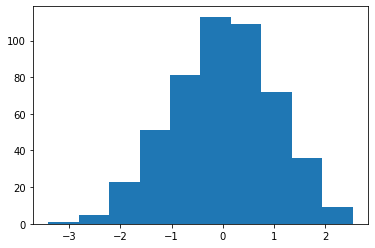

In [34]:
plt.hist(z_group["Age"])

In [35]:
## para reemplzar valores na por la media
fill_na_mean = lambda x : x.fillna(x.mean())

In [36]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,196.452054,58.523757,21.737296,21302.769977
1,188.257761,33.874115,27.256809,18565.118295
2,155.926819,15.735645,28.017813,18768.398253
3,126.607558,79.641549,54.710038,21179.913406
4,186.006180,58.846956,32.470085,18087.860754
...,...,...,...,...
495,161.844316,59.918835,22.466349,19851.739991
496,206.006248,92.545544,22.343879,20799.803026
497,156.323279,59.228023,7.282517,20180.219816
498,200.811722,-4.962383,15.470256,18117.808118


## Operaciones diversas muy útiles

In [37]:
## orimer elemento
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,196.452054,58.523757,21.737296,21302.769977
1,Female,Poor,188.257761,33.874115,27.256809,18565.118295
3,Female,Rich,126.607558,79.641549,54.710038,21179.913406
8,Male,Middle Class,147.931123,121.083334,35.699420,19166.778962
12,Female,Middle Class,125.430432,47.002335,34.655052,18029.090721
29,Male,Poor,154.357430,79.801220,40.406649,19833.226113


In [38]:
## uktima fila
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
491,Male,Rich,147.990436,43.005256,42.217143,19705.266049
492,Male,Middle Class,158.553684,52.001397,13.286343,19885.273884
496,Female,Middle Class,206.006248,92.545544,22.343879,20799.803026
497,Female,Rich,156.323279,59.228023,7.282517,20180.219816
498,Male,Poor,200.811722,-4.962383,15.470256,18117.808118
499,Female,Poor,132.773105,54.387855,-7.882661,20604.985862


In [39]:
## elemento en tal posicion
double_group.nth(32)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     206.058974  113.412204  40.499917  18055.141868
       Poor             150.756446  124.598482  45.227127  19256.727252
       Rich             183.679308   52.151381  12.493116  18642.632693
Male   Middle Class     159.233882   69.364198  33.530827  21283.338817
       Poor             126.501103   68.308167  42.454846  20365.319259
       Rich             164.146210   44.265862  45.489105  20240.336683

In [40]:
## para ordenar los valores
data_sorted = data.sort_values(["Age", "Income"])

In [41]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
499,Female,Poor,132.773105,54.387855,-7.882661,20604.985862
348,Male,Poor,179.025532,71.658241,0.950670,19416.708555
373,Male,Rich,166.643435,54.114182,2.160113,21396.891454
112,Male,Middle Class,159.669623,63.465570,2.782119,20716.460234
481,Male,Rich,185.578696,83.455145,3.023519,19780.443968
283,Female,Rich,183.362544,69.449994,3.652287,20418.827981
199,Male,Rich,197.149838,25.419112,3.901974,20259.067877
260,Male,Poor,164.160285,83.267797,3.929836,18903.489779
343,Male,Rich,115.231449,124.538041,4.103112,19184.434111
315,Male,Poor,120.515196,46.348092,4.548008,18611.257171


In [42]:
age_grouped = data_sorted.groupby("Gender")

In [43]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
499,Female,Poor,132.773105,54.387855,-7.882661,20604.985862
348,Male,Poor,179.025532,71.658241,0.950670,19416.708555


In [45]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
484,Female,Poor,152.629514,79.382840,61.788963,20846.765617
423,Male,Rich,115.441259,34.497382,64.932330,18867.768996


## Conjunto de entrenamiento y conjunto de testing

In [47]:
#el datset se suele dividir en conjunto de entranamiento y testing.
#El conjunto de entranmiento es con el cual se construye el modelo, se hacen los calculos, parametros y se construyen las ecociiones.
#EL conjunto testing: se usa para comprobar la eficacia de cicho de modelo, las ecuaciones y parametros se usan para comprabar cuales son las salidas, y estas salidas se usan para comprobar la eficiacia del modelo y comprarbar si es util. 
#Puedo ver si el resultado de la prediccion es bueno o malo con el resultado original.
#Se divide 80 a 20. o 75 a 25.

#El metodo mejor es utilizaruno aleatorio para seleccionar las filas.


#### Actualización: cómo dividir conjunto de entrenamiento y test

#En vez de utilizar la librería ya no existe:

#from sklearn.cross_validation import train_test_split

#ahora es mejor utilizar:

#from sklearn.model_selection import train_test_split


#También cuidado si quieres representar un vector de variables booleanas, ya que al hacer un histograma obtendrás un error. Ahora debes añadir un casting con .astype(int) al final de la lista de python para poderlo representar. 

In [48]:
import pandas as pd

In [49]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [50]:
len(data)

3333

### Dividir utilizando la distribución normal

In [51]:
## creo un vector de la misma longitud de nuestros datos con valores aleatorios
a = np.random.randn(len(data))

(array([  5.,  22., 115., 416., 822., 942., 693., 242.,  65.,  11.]),
 array([-3.85924547, -3.12423777, -2.38923008, -1.65422238, -0.91921469,
        -0.18420699,  0.5508007 ,  1.2858084 ,  2.02081609,  2.75582379,
         3.49083148]),
 <a list of 10 Patch objects>)

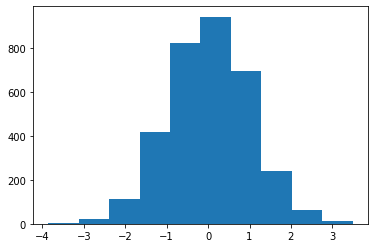

In [52]:
plt.hist(a)

In [53]:
## me quedo con los datos 75% para entrenamiento
check = (a<0.75)

In [54]:
check

array([ True, False, False, ...,  True, False,  True])

(array([ 777.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2556.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

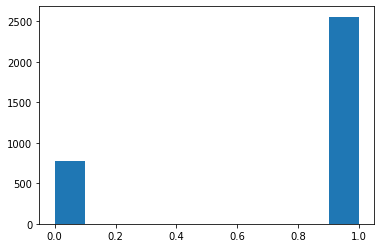

In [56]:
plt.hist(check.astype(int) )

In [57]:
## divido los datos en entreanmiento y testing
training = data[check]
testing = data[~check]

In [58]:
len(training)

2556

In [59]:
len(testing)

777

## Con la libreria sklearn

In [62]:
from sklearn.model_selection import train_test_split ## posee muchos metodos implementado para dvidir un dataset

In [64]:
## tecnica de la validacion cruzada

In [66]:
## definio el conjunto de entrenamiento y test
train, test = train_test_split(data, test_size = 0.2)

In [67]:
len(train)

2666

In [68]:
len(test)

667

## Usando una función de shuffle

In [70]:
## si quiero controlar cual va a hacer en entranamiento y testing

In [71]:
import numpy as np

In [72]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [73]:
import sklearn

In [74]:
data = sklearn.utils.shuffle(data) ## mezclamos los datos

In [79]:
## divido los datos
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [77]:
len(train_data)

2499

In [78]:
len(test_data)

833